In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.image as image
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
import geopandas as gpd
import matplotlib.colors as mcolors

In [122]:
df_arrest = pd.read_csv('Police_Arrests_20240702.csv')

In [123]:
df_arrest['Event Date/Time'] = pd.to_datetime(df_arrest['Event Date/Time'])

In [124]:
df_arrest.shape

(23510, 10)

In [125]:
df_arrest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23510 entries, 0 to 23509
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID Reference Number     23510 non-null  int64         
 1   Subject's race          23510 non-null  object        
 2   Subject's gender        23510 non-null  object        
 3   Subject's age           23510 non-null  int64         
 4   Ethnicity               23510 non-null  object        
 5   District of occurrence  23408 non-null  float64       
 6   Adjacent to School      23510 non-null  int64         
 7   Assigned Division       23381 non-null  object        
 8   Assigned Bureau         18851 non-null  object        
 9   Event Date/Time         23510 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 1.8+ MB


In [126]:
df_arrest.describe()

,ID Reference Number,Subject's age,District of occurrence,Adjacent to School,Event Date/Time
count,23510.00000,23510.000000,23408.000000,23510.000000,23510
mean,11755.50000,31.813143,3.989192,0.085155,2022-11-01 01:32:00.372607232
min,1.00000,1.000000,1.000000,0.000000,2021-01-01 00:00:00
25%,5878.25000,22.000000,3.000000,0.000000,2021-12-31 16:10:45
50%,11755.50000,30.000000,4.000000,0.000000,2022-11-18 07:04:00
75%,17632.75000,39.000000,5.000000,0.000000,2023-09-05 21:43:00
max,23510.00000,99.000000,8.000000,1.000000,2024-07-01 16:23:00
std,6786.89675,12.946909,1.748587,0.279119,NaN


In [127]:
df_arrest.loc[(df_arrest['Subject\'s age'] <= 5)]

,ID Reference Number,Subject's race,Subject's gender,Subject's age,Ethnicity,District of occurrence,Adjacent to School,Assigned Division,Assigned Bureau,Event Date/Time
5497,5498,Black/African American,Male,1,NON-HISPANIC,3.0,0,TOD,FSB,2021-12-17 01:11:00


In [128]:
df_arrest.loc[(df_arrest['Subject\'s age'] >= 95)]

,ID Reference Number,Subject's race,Subject's gender,Subject's age,Ethnicity,District of occurrence,Adjacent to School,Assigned Division,Assigned Bureau,Event Date/Time
2023,2024,White,Female,99,NON-HISPANIC,1.0,0,RCPD,NaN,2021-05-21 21:32:00
2966,2967,White,Female,99,NON-HISPANIC,6.0,0,6D,PSB,2021-07-26 15:32:00
6579,6580,White,Male,99,HISPANIC,6.0,0,GPD,NaN,2022-02-17 00:40:00
13022,13023,Black/African American,Male,99,NON-HISPANIC,5.0,0,5D,PSB,2023-01-26 16:24:00
15903,15904,White,Male,99,NON-HISPANIC,1.0,0,RCPD,NaN,2023-06-17 12:45:00
20261,20262,White,Female,99,HISPANIC,3.0,0,3D,PSB,2024-01-22 19:33:00
21334,21335,Asian,Female,99,NON-HISPANIC,4.0,1,CED,FSB,2024-03-11 10:15:00
23334,23335,Black/African American,Male,99,NON-HISPANIC,5.0,0,5D,PSB,2024-02-24 00:00:00


In [129]:
df_arrest = df_arrest.loc[(df_arrest['Subject\'s age']>=5) & (df_arrest['Subject\'s age']<=95)]
df_arrest.shape

(23501, 10)

In [130]:
df_arrest["Adjacent to School"].unique(), df_arrest["District of occurrence"].unique()

(array([0, 1]), array([ 6.,  1.,  4.,  3.,  5.,  2.,  8., nan]))

In [131]:
df_arrest["Subject's gender"].unique(), df_arrest["Ethnicity"].unique(), 

(array(['Male', 'Female'], dtype=object),
 array(['NON-HISPANIC', 'HISPANIC'], dtype=object))

In [132]:
df_arrest.isnull().sum()

ID Reference Number          0
Subject's race               0
Subject's gender             0
Subject's age                0
Ethnicity                    0
District of occurrence     102
Adjacent to School           0
Assigned Division          129
Assigned Bureau           4656
Event Date/Time              0
dtype: int64

In [133]:
pd.crosstab(df_arrest["Ethnicity"], columns='count')

col_0,count
Ethnicity,
HISPANIC,7150
NON-HISPANIC,16351


In [134]:
pd.crosstab(df_arrest["Subject's gender"], columns='count')

col_0,count
Subject's gender,
Female,4939
Male,18562


In [135]:
df_arrest['month'] = df_arrest['Event Date/Time'].dt.month
df_arrest.head(5)

,ID Reference Number,Subject's race,Subject's gender,Subject's age,Ethnicity,District of occurrence,Adjacent to School,Assigned Division,Assigned Bureau,Event Date/Time,month
0,1,Asian,Male,43,NON-HISPANIC,6.0,0,TOD,FSB,2021-01-01 01:07:00,1
1,2,Black/African American,Male,23,NON-HISPANIC,1.0,0,RCPD,NaN,2021-01-01 00:52:00,1
2,3,Black/African American,Male,18,NON-HISPANIC,1.0,0,RCPD,NaN,2021-01-01 00:52:00,1
3,4,Black/African American,Male,21,NON-HISPANIC,1.0,0,RCPD,NaN,2021-01-01 00:52:00,1
4,5,White,Female,38,HISPANIC,4.0,0,TOD,FSB,2021-01-01 03:00:00,1


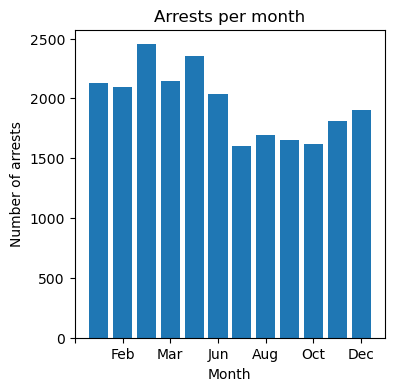

In [136]:
fig, ax = plt.subplots(figsize=(4,4))
x1 = pd.crosstab(df_arrest['month'], columns='count')
y1 = np.arange(1,13)

ax.bar(y1,x1['count'])

ax.set_title('Arrests per month')
ax.set_ylabel('Number of arrests')
ax.set_xlabel('Month')

ax.set_xticks([0,2,4,6,8,10,12])
ax.set_xticklabels(['','Feb','Mar','Jun','Aug','Oct','Dec'])

plt.show()

In [137]:
#Show map and show number of arrests in each district

In [138]:
pd.crosstab(df_arrest['District of occurrence'], columns='Count')

col_0,Count
District of occurrence,
1.0,2511
2.0,2196
3.0,4780
4.0,4562
5.0,3818
6.0,4746
8.0,786


In [139]:
df_arrest1 = df_arrest.copy()
df_arrest1.head(5)

,ID Reference Number,Subject's race,Subject's gender,Subject's age,Ethnicity,District of occurrence,Adjacent to School,Assigned Division,Assigned Bureau,Event Date/Time,month
0,1,Asian,Male,43,NON-HISPANIC,6.0,0,TOD,FSB,2021-01-01 01:07:00,1
1,2,Black/African American,Male,23,NON-HISPANIC,1.0,0,RCPD,NaN,2021-01-01 00:52:00,1
2,3,Black/African American,Male,18,NON-HISPANIC,1.0,0,RCPD,NaN,2021-01-01 00:52:00,1
3,4,Black/African American,Male,21,NON-HISPANIC,1.0,0,RCPD,NaN,2021-01-01 00:52:00,1
4,5,White,Female,38,HISPANIC,4.0,0,TOD,FSB,2021-01-01 03:00:00,1


In [140]:
df_arrest1[df_arrest1['District of occurrence']==8]

,ID Reference Number,Subject's race,Subject's gender,Subject's age,Ethnicity,District of occurrence,Adjacent to School,Assigned Division,Assigned Bureau,Event Date/Time,month
37,38,Black/African American,Male,20,NON-HISPANIC,8.0,0,TPPD,NaN,2021-01-03 01:33:00,1
40,41,Black/African American,Male,19,HISPANIC,8.0,0,TPPD,NaN,2021-01-03 03:04:00,1
96,97,White,Female,15,HISPANIC,8.0,1,TPPD,NaN,2021-01-06 19:36:00,1
97,98,White,Female,16,HISPANIC,8.0,1,TPPD,NaN,2021-01-06 19:36:00,1
241,242,White,Male,41,HISPANIC,8.0,0,TPPD,NaN,2021-01-17 03:50:00,1
...,...,...,...,...,...,...,...,...,...,...,...
23205,23206,White,Female,19,NON-HISPANIC,8.0,0,TPPD,NaN,2024-06-11 11:14:00,6
23397,23398,White,Male,52,NON-HISPANIC,8.0,0,4D,PSB,2024-06-15 00:26:00,6
23421,23422,Black/African American,Male,33,NON-HISPANIC,8.0,0,TPPD,NaN,2024-06-24 03:45:00,6
23432,23433,White,Male,18,HISPANIC,8.0,0,TPPD,NaN,2024-06-25 04:36:00,6


In [141]:
cross1 = pd.crosstab(df_arrest1['District of occurrence'], columns='count')

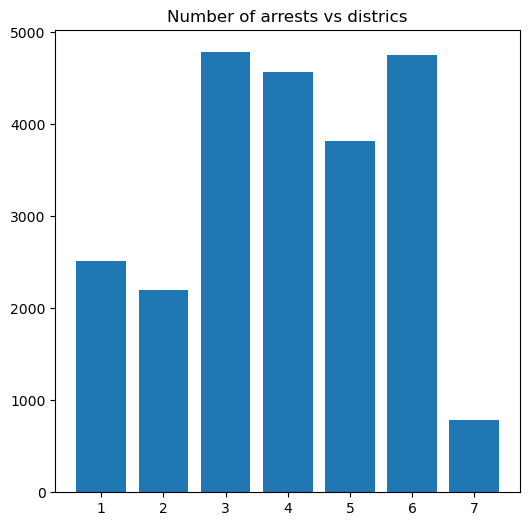

In [142]:
fig, ax = plt.subplots(figsize=(6,6))
xc1=[1,2,3,4,5,6,7]
ax.bar(xc1, cross1['count'])

ax.set_title('Number of arrests vs districs')
plt.show()

In [143]:
xc_school = pd.crosstab(df_arrest1['Adjacent to School'], columns='count')


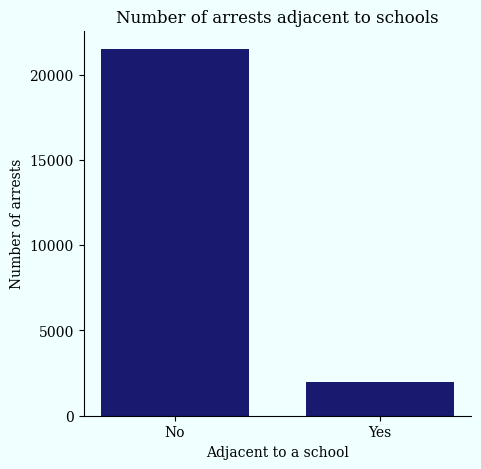

In [144]:
fig , ax  = plt.subplots(figsize=(5,5))
csfont = {'family':'serif'}
ax.bar([0,1],xc_school['count'], color='midnightblue', width=0.72, zorder=2)
ax.set_xticks([0,1])
ax.set_xticklabels(['No','Yes'], fontdict=csfont)
ax.set_yticks([0,5000,10000,15000,20000])
ax.set_yticklabels([0,5000,10000,15000,20000], fontdict= {'family':'serif'})

ax.set_title('Number of arrests adjacent to schools', fontdict=csfont)
ax.set_ylabel('Number of arrests', fontdict=csfont)
ax.set_xlabel('Adjacent to a school', fontdict=csfont)

ax.set_facecolor(color='azure')
fig.patch.set_facecolor('azure')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

In [145]:
gdf = gpd.read_file('shapefile.shp')
gdf


,geometry
0,"POLYGON ((-77.43119 39.23204, -77.17333 39.352..."
1,"POLYGON ((-77.26797 39.13263, -77.2677 39.1325..."
2,"POLYGON ((-77.06553 39.24894, -77.06274 39.247..."
3,"POLYGON ((-76.9903 38.99267, -76.98778 38.9900..."
4,"POLYGON ((-77.09092 39.05322, -77.09165 39.053..."
5,"POLYGON ((-77.24743 39.0265, -77.2469 39.02789..."


In [146]:
gdf['District of occurrence'] = 0
gdf

,geometry,District of occurrence
0,"POLYGON ((-77.43119 39.23204, -77.17333 39.352...",0
1,"POLYGON ((-77.26797 39.13263, -77.2677 39.1325...",0
2,"POLYGON ((-77.06553 39.24894, -77.06274 39.247...",0
3,"POLYGON ((-76.9903 38.99267, -76.98778 38.9900...",0
4,"POLYGON ((-77.09092 39.05322, -77.09165 39.053...",0
5,"POLYGON ((-77.24743 39.0265, -77.2469 39.02789...",0


In [147]:
gdf.at[0,'District of occurrence'] = 5
gdf.at[1,'District of occurrence'] = 6
gdf.at[2,'District of occurrence'] = 4
gdf.at[3,'District of occurrence'] = 3
gdf.at[4,'District of occurrence'] = 1
gdf.at[5,'District of occurrence'] = 2
gdf

,geometry,District of occurrence
0,"POLYGON ((-77.43119 39.23204, -77.17333 39.352...",5
1,"POLYGON ((-77.26797 39.13263, -77.2677 39.1325...",6
2,"POLYGON ((-77.06553 39.24894, -77.06274 39.247...",4
3,"POLYGON ((-76.9903 38.99267, -76.98778 38.9900...",3
4,"POLYGON ((-77.09092 39.05322, -77.09165 39.053...",1
5,"POLYGON ((-77.24743 39.0265, -77.2469 39.02789...",2


In [148]:
map_and_stats=gdf.merge(cross1, on="District of occurrence")
map_and_stats['District of occurrence'].unique()


array([5, 6, 4, 3, 1, 2])

In [149]:
map_and_stats

,geometry,District of occurrence,count
0,"POLYGON ((-77.43119 39.23204, -77.17333 39.352...",5,3818
1,"POLYGON ((-77.26797 39.13263, -77.2677 39.1325...",6,4746
2,"POLYGON ((-77.06553 39.24894, -77.06274 39.247...",4,4562
3,"POLYGON ((-76.9903 38.99267, -76.98778 38.9900...",3,4780
4,"POLYGON ((-77.09092 39.05322, -77.09165 39.053...",1,2511
5,"POLYGON ((-77.24743 39.0265, -77.2469 39.02789...",2,2196


In [150]:
(map_and_stats['count']/map_and_stats['count'].sum())*100

0    16.884093
1    20.987927
2    20.174236
3    21.138283
4    11.104232
5     9.711228
Name: count, dtype: float64

In [151]:
map_and_stats['Ds'] = ''

for i, row in map_and_stats.iterrows():
    district = row['District of occurrence']
    count = row['count']
    
    if district in [1, 2, 3, 4, 5, 6]:
        map_and_stats.at[i, 'Ds'] = f'D{district}: {count}'

map_and_stats

,geometry,District of occurrence,count,Ds
0,"POLYGON ((-77.43119 39.23204, -77.17333 39.352...",5,3818,D5: 3818
1,"POLYGON ((-77.26797 39.13263, -77.2677 39.1325...",6,4746,D6: 4746
2,"POLYGON ((-77.06553 39.24894, -77.06274 39.247...",4,4562,D4: 4562
3,"POLYGON ((-76.9903 38.99267, -76.98778 38.9900...",3,4780,D3: 4780
4,"POLYGON ((-77.09092 39.05322, -77.09165 39.053...",1,2511,D1: 2511
5,"POLYGON ((-77.24743 39.0265, -77.2469 39.02789...",2,2196,D2: 2196


In [152]:
gdf.geometry.centroid.x, gdf.geometry.centroid.y

(0   -77.248434
 1   -77.184923
 2   -77.042613
 3   -76.978271
 4   -77.329477
 5   -77.144100
 dtype: float64,
 0    39.234758
 1    39.152571
 2    39.128365
 3    39.052335
 4    39.111766
 5    39.002314
 dtype: float64)

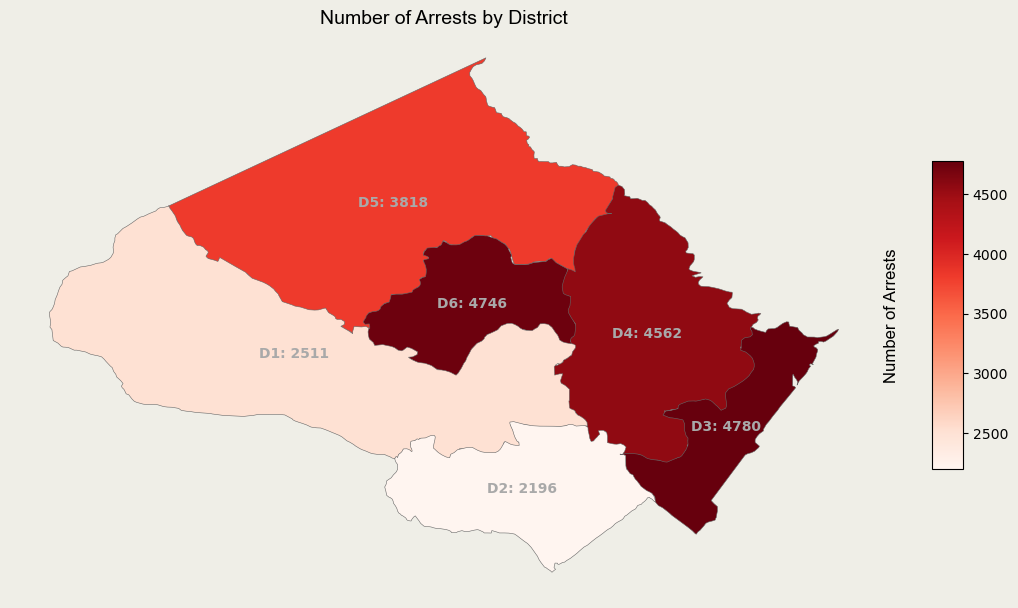

In [153]:
fig, ax = plt.subplots(1, figsize=(14, 8))

map_and_stats.plot(column="count", cmap='Reds', linewidth=0.4, ax=ax, edgecolor=".4")

bar_info = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=map_and_stats['count'].min(), vmax=map_and_stats['count'].max()))
bar_info._A = []
cbar = fig.colorbar(bar_info, ax=ax, shrink=0.5, aspect=10)

for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, map_and_stats['Ds']):
    ax.text(x, y, label, fontsize=10, ha='center', va='center', color='darkgrey', weight='bold')

ax.set_title('Number of Arrests by District', fontname='Arial', fontsize=14)
ax.set_ylabel('Number of Arrests', fontname='Arial', fontsize=12)
ax.yaxis.set_label_position('right')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_xticks([])
ax.set_yticks([])

plt.xticks(rotation=90)
ax.set_facecolor(color='#efeee7')
fig.patch.set_facecolor('#efeee7')
#efeee7
plt.show()

In [154]:
df_arrest['year'] = df_arrest['Event Date/Time'].dt.year

In [155]:
df_arrest.head(5)

,ID Reference Number,Subject's race,Subject's gender,Subject's age,Ethnicity,District of occurrence,Adjacent to School,Assigned Division,Assigned Bureau,Event Date/Time,month,year
0,1,Asian,Male,43,NON-HISPANIC,6.0,0,TOD,FSB,2021-01-01 01:07:00,1,2021
1,2,Black/African American,Male,23,NON-HISPANIC,1.0,0,RCPD,NaN,2021-01-01 00:52:00,1,2021
2,3,Black/African American,Male,18,NON-HISPANIC,1.0,0,RCPD,NaN,2021-01-01 00:52:00,1,2021
3,4,Black/African American,Male,21,NON-HISPANIC,1.0,0,RCPD,NaN,2021-01-01 00:52:00,1,2021
4,5,White,Female,38,HISPANIC,4.0,0,TOD,FSB,2021-01-01 03:00:00,1,2021


In [156]:
map_and_stats

,geometry,District of occurrence,count,Ds
0,"POLYGON ((-77.43119 39.23204, -77.17333 39.352...",5,3818,D5: 3818
1,"POLYGON ((-77.26797 39.13263, -77.2677 39.1325...",6,4746,D6: 4746
2,"POLYGON ((-77.06553 39.24894, -77.06274 39.247...",4,4562,D4: 4562
3,"POLYGON ((-76.9903 38.99267, -76.98778 38.9900...",3,4780,D3: 4780
4,"POLYGON ((-77.09092 39.05322, -77.09165 39.053...",1,2511,D1: 2511
5,"POLYGON ((-77.24743 39.0265, -77.2469 39.02789...",2,2196,D2: 2196


In [157]:
a1 = pd.crosstab(df_arrest['Subject\'s race'],df_arrest['Ethnicity'])
a1

Ethnicity,HISPANIC,NON-HISPANIC
Subject's race,,
American Indian/ALSK Natv,6,30
Asian,12,619
Black/African American,258,11234
Hawaiian/Pacific Islander,8,12
Unknown,53,18
White,6813,4438


In [158]:
b1 = pd.crosstab(df_arrest['Subject\'s race'], columns='count')
b1

col_0,count
Subject's race,
American Indian/ALSK Natv,36
Asian,631
Black/African American,11492
Hawaiian/Pacific Islander,20
Unknown,71
White,11251


In [159]:
xp1 = sorted(df_arrest['Subject\'s race'].unique())

In [160]:
yp1 = a1['HISPANIC']/b1['count']
yp1

Subject's race
American Indian/ALSK Natv    0.166667
Asian                        0.019017
Black/African American       0.022450
Hawaiian/Pacific Islander    0.400000
Unknown                      0.746479
White                        0.605546
dtype: float64

In [161]:
yp2 = a1['NON-HISPANIC']/b1['count']
yp2

Subject's race
American Indian/ALSK Natv    0.833333
Asian                        0.980983
Black/African American       0.977550
Hawaiian/Pacific Islander    0.600000
Unknown                      0.253521
White                        0.394454
dtype: float64

In [162]:

pd.crosstab(df_arrest['Subject\'s race'],df_arrest['Ethnicity'], normalize='index')


Ethnicity,HISPANIC,NON-HISPANIC
Subject's race,,
American Indian/ALSK Natv,0.166667,0.833333
Asian,0.019017,0.980983
Black/African American,0.022450,0.977550
Hawaiian/Pacific Islander,0.400000,0.600000
Unknown,0.746479,0.253521
White,0.605546,0.394454


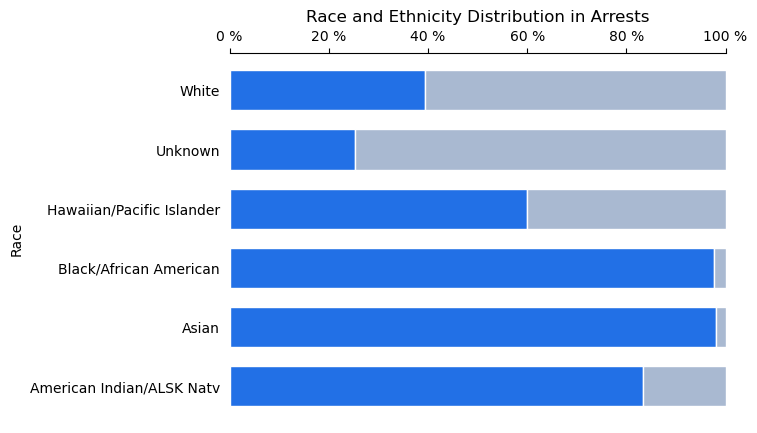

In [163]:
fig, ax = plt.subplots()
xp1 = sorted(df_arrest['Subject\'s race'].unique())

ax.barh(xp1, yp2,  height=0.68, label="Hispanic", color='#2270e6', edgecolor = 'white')
ax.barh(xp1,  yp1 ,  left=yp2, height=0.68, label="Non hispanic", color='#a9b9d1', edgecolor = 'white')

ax.xaxis.tick_top()

ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_ticks_position('none') 

ax.set_xlim(0, 1)

ax.set_xticks([0,.2,.4,.6,.8,1])

ax.set_xticklabels(['0 %','20 %','40 %','60 %','80 %','100 %'])

ax.set_ylabel("Race")
ax.set_title('Race and Ethnicity Distribution in Arrests')

plt.show()